# STEP 2

###  ASKING QUESTIONS ABOUT RALPH GARZA (SPECIFIC PLAYER DATA)

### Setup

In [28]:
# only import modules you are going to use
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


### Load the data

In [2]:
RalphGarza_df = pd.read_csv('../data/Clean_Data_Files/RalphGarza_df.csv')
RalphGarza_df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,FF,2021-09-30,92.3,-1.03,5.66,"Garza Jr., Ralph",605612,621248,double,...,7,7,7,7,7,Standard,Standard,216,-0.313,1.719
1,1,CH,2021-09-30,84.4,-0.92,5.69,"Garza Jr., Ralph",605612,621248,NaN,...,7,6,7,6,7,Standard,Standard,236,0.000,-0.113
2,2,CH,2021-09-30,85.3,-1.21,5.67,"Garza Jr., Ralph",605612,621248,NaN,...,7,6,7,6,7,Strategic,Standard,237,0.000,-0.100
3,3,FF,2021-09-30,91.7,-1.12,5.67,"Garza Jr., Ralph",600869,621248,walk,...,7,6,7,6,7,Infield shift,Standard,212,-0.121,0.234
4,4,FF,2021-09-30,92.4,-0.99,5.60,"Garza Jr., Ralph",600869,621248,NaN,...,7,6,7,6,7,Infield shift,Standard,213,0.000,0.226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,480,CU,2021-05-29,76.5,-2.50,4.35,"Garza Jr., Ralph",571976,621248,NaN,...,8,8,8,8,8,Standard,Standard,90,0.000,0.058
481,481,SI,2021-05-29,91.0,-2.38,4.78,"Garza Jr., Ralph",571976,621248,NaN,...,8,8,8,8,8,Standard,Standard,252,0.000,-0.072
482,482,FF,2021-05-29,92.6,-1.19,6.02,"Garza Jr., Ralph",543333,621248,field_out,...,8,8,8,8,8,Standard,Standard,219,0.120,-0.799
483,483,FC,2021-05-29,89.9,-1.13,6.03,"Garza Jr., Ralph",543333,621248,NaN,...,8,8,8,8,8,Standard,Standard,195,0.000,0.181


# Table of Contents: 

* Question 1: What is the average release point for when Ralph Garza allows a home run? How does it compare to other event outcomes?

* Question 2: In a two strike count, what is the most used pitch by Ralph? 

* Question 3: What release point results in the slowest launch speed? What pitch type in the slowest launch speed? 

* Question 4: How does the release point change when a runner is off base? 

* Question 5: Does the release speed correlate with the position the ball is released from?

# Block 1

## Question 1: What is the average release point for when Ralph Garza allows a home run? How does it compare to other event outcomes?

## Steps: 

* Group the dataframe by "events"
* Get the average "release_pos_z" for each of these event types
* Sort the outcomes by highest to lowest
* Select "home run"
* Look at "home run" and its related data

In [3]:
#Group the dataframe by events
#Get the average 'release_pos_z' from each group
garza_groupby_events = RalphGarza_df.groupby("events")["release_pos_z"].mean().sort_values()

#Sort events by lowest to highest release_point_z averages
garza_groupby_events.sort_values(ascending = False)

#Print results
print('Release points for each event type')
print(garza_groupby_events)

Release points for each event type
events
hit_by_pitch                 4.470000
single                       4.806667
field_out                    4.975660
grounded_into_double_play    4.990000
home_run                     5.030000
strikeout                    5.054828
double                       5.195714
walk                         5.283846
force_out                    5.776667
Name: release_pos_z, dtype: float64


## Answer: 

The average release point for when Ralph Garza allows a homerun is 5.03. The average release point for a homerun is the median average release point for all events.

## Interpretation:

The average release point for a homerun (5.03) and a strikeout (5.05) are very close together; thus, the average release point may not be a good indicator of the event that occurse after the pitcher pitches. 

# Block 2

## Question 2: In a two strike count, what is the most used pitch by Ralph? 

## Steps:

* Create a row filter for every instance with two strikes
* Create a df for every instance with two strikes
* Group by two strike dataframe by pitch type & count how many times each pitch type occurs

In [4]:
row_filter = RalphGarza_df['strikes'] == 2
two_strike = RalphGarza_df[row_filter]
two_strike_pitch = two_strike['pitch_type'].value_counts()
two_strike_pitch.sort_values(ascending = False)

CU    64
SI    28
FF    23
CH    15
SL     9
FC     9
Name: pitch_type, dtype: int64

## Answer: 

In a two strike count, the most used pitch by Ralph is the curveball pitch. 

## Interpretation: 

The curveball pitch must be an more likely way to strike someone out than any of the other pitch types. 

# Block 3

## Question 3: What release point results in the slowest launch speed? What's the pitch type in the slowest launch speed? 

## Steps: 

* Create a row filter to remove any data where the launch_speed is NaN
* Group the speed_filt_df by 'release_pos_z', take the mean of each group's launch speeds, sort the list, assign to a new data frame variable
* Group the speed_filt_df by 'pitch_type', take the mean of each group's launch speeds, sort the list, assign to a new data frame variable
* Print the top 10 values in each new dataframe


In [5]:
speed_filt_df = RalphGarza_df[RalphGarza_df['launch_speed'].isna() == False]
garza_groupby_release = speed_filt_df.groupby('release_pos_z')['launch_speed'].mean().sort_values()
garza_groupby_pitch = speed_filt_df.groupby('pitch_type')['launch_speed'].mean().sort_values()

print('Top 10 release points with the slowest launch speeds')
print(garza_groupby_release.head(10))
print()
print()
print('Pitch type organized by slowest launch speeds')
print(garza_groupby_pitch)

Top 10 release points with the slowest launch speeds
release_pos_z
4.67    39.750000
4.24    54.433333
4.58    57.000000
5.78    57.200000
5.57    59.500000
4.45    62.700000
4.82    63.300000
4.34    65.300000
4.20    65.550000
5.84    66.900000
Name: launch_speed, dtype: float64


Pitch type organized by slowest launch speeds
pitch_type
SL    61.500000
CH    69.592308
CU    78.731579
FC    81.947059
SI    83.635185
FF    88.826471
Name: launch_speed, dtype: float64


## Answer: 

A release point on 4.67 results in the lowest launch speed, which is 39.75.

A slider pitch type is the pitch type that results in the slowest launch speed, which is 61.5.

## Interpretation:

Depending on the goal of the pitcher it may be more beneficial to pitch from a position of 4.67 or using the slider pitch type. If it is not beneficial then the player should not use these tactics. 

# Block 4

## Question 4: How does the release point change when a runner is on base? Does the velocity of a pitch with a runner on base change with runners on base?

## Steps:

* Create a "Empty base" dataframe
* Create a "Runner on Base" dataframe
* Compare the average release position z & pitch velocity within each database

In [6]:
non_third = RalphGarza_df["on_3b"].isnull()
non_second = RalphGarza_df["on_2b"].isnull()
non_first = RalphGarza_df["on_1b"].isnull()

RalphGarza_emptybase_df = RalphGarza_df[non_third & non_second & non_first]
RalphGarza_emptybase_df.head(2)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
7,7,SI,2021-09-30,90.3,-2.17,4.34,"Garza Jr., Ralph",570731,621248,walk,...,7,6,7,6,7,Standard,Standard,247,-0.088,0.251
8,8,SI,2021-09-30,91.5,-2.25,4.40,"Garza Jr., Ralph",570731,621248,NaN,...,7,6,7,6,7,Standard,Standard,243,0.000,0.113


In [7]:
RalphGarza_emptybase_df["release_pos_z"].mean().round(3)

4.944

In [8]:
on_third = RalphGarza_df["on_3b"] > 0
on_second = RalphGarza_df["on_2b"] > 0
on_first = RalphGarza_df["on_1b"] > 0

RalphGarza_onbase_df = RalphGarza_df[on_third | on_second | on_first]
RalphGarza_onbase_df.head(2)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,FF,2021-09-30,92.3,-1.03,5.66,"Garza Jr., Ralph",605612,621248,double,...,7,7,7,7,7,Standard,Standard,216,-0.313,1.719
1,1,CH,2021-09-30,84.4,-0.92,5.69,"Garza Jr., Ralph",605612,621248,NaN,...,7,6,7,6,7,Standard,Standard,236,0.000,-0.113


In [9]:
RalphGarza_onbase_df["release_pos_z"].mean().round(3)

5.067

In [10]:
#Compare the average release position z & pitch velocity within each database
empty_release_pt = RalphGarza_emptybase_df["release_pos_z"].mean().round(3)
empty_velocity = RalphGarza_emptybase_df["release_speed"].mean().round(3)

runner_release_pt = RalphGarza_onbase_df["release_pos_z"].mean().round(3)
runner_velocity = RalphGarza_onbase_df["release_speed"].mean().round(3)

print("Release Position for Empty Bases: ", empty_release_pt)
print("Release Position for Runners on: ", runner_release_pt)
print("Abs diff:", np.absolute(empty_release_pt -runner_release_pt).round(3)  )
print("\n")
print("Velocity for Empty Bases: ", empty_velocity)
print("Velocity for Runners on: ", runner_velocity)
print("Abs diff:", np.absolute(empty_velocity -runner_velocity).round(3)  )

Release Position for Empty Bases:  4.944
Release Position for Runners on:  5.067
Abs diff: 0.123


Velocity for Empty Bases:  84.957
Velocity for Runners on:  86.258
Abs diff: 1.301


## Answer: 

The absolute difference between the average release positions when there were empty bases vs when there were non-empty bases is 0.123.

The absolute difference between the average velocities when there were empty bases vs when there were non-empty bases is 1.301.

## Interpretation:

There is no significant difference between release positions and velocities when there are players on or off the bases, so no conclusions to draw beyond that.

# Block 5

## Question 5: Does the release speed correlate with the position the ball is released from?

## Steps:


release_pos_z
4.68    73.600000
4.42    75.400000
4.67    76.000000
4.22    76.033333
4.55    76.066667
4.99    76.200000
4.32    76.200000
4.85    76.250000
4.05    76.300000
4.54    76.500000
Name: release_speed, dtype: float64


Text(0, 0.5, 'Release Speed')

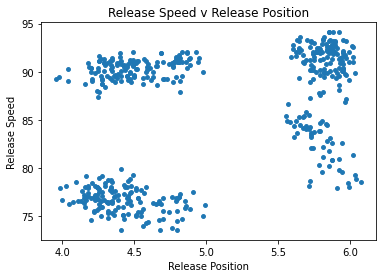

In [29]:
##code

#get release speed 
angle_filter2 = RalphGarza_df[RalphGarza_df['release_speed'].isna() == False]
garza_speed_pos = angle_filter2.groupby('release_pos_z')['release_speed'].mean().sort_values()
print(garza_speed_pos.head(10))



plt.scatter(angle_filter2['release_pos_z'], 
            angle_filter2['release_speed'], s= 15
           )
plt.title('Release Speed v Release Position')
plt.xlabel('Release Position')
plt.ylabel('Release Speed')

<div class="alert alert-warning">

* This looks like an interesting plot with some clustering
    

* Which other variable(s) explain the clusters?
    
    
* Is it `pitch_type`? Here you could color the points (easiest to switch to `seaborn` and use `sns.scatterplot` function:

</div>

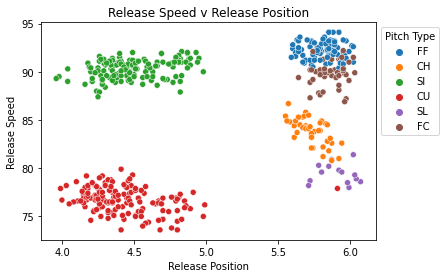

In [34]:
sns.scatterplot(x='release_pos_z',
                y='release_speed',
                hue='pitch_type',
                data=angle_filter2
               )

plt.legend(bbox_to_anchor=(1.0, 1.0), title='Pitch Type')
plt.title('Release Speed v Release Position')
plt.xlabel('Release Position')
plt.ylabel('Release Speed')
plt.show()

## Answer: 

There are pockets of correlation that exist, but overall there is no strong correlation.

## Interpretation:

The data suggests that balls pitched between release position 4 and 5 are usually in the 75-80 release speed range OR the 87-93 release speed range. The data also shows that balls released between release position 5.5 and 6 have a wider range of speeds, but on average slightly faster than the bottom left cluster. It would be interesting to pinpoint which types of pitches are common for the release speed and release position combinations.